In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
pollution_data = pd.read_excel('chennai.xlsx')
pollution_data.head(5)

,From Date,To Date,PM2.5,SO2,NO2,CO,NO
0,09-01-2016 00:00,10-01-2016 00:00,71.73,1.98,49.43,626.17,9.88
1,10-01-2016 00:00,11-01-2016 00:00,72.21,1.40,46.84,576.03,10.15
2,11-01-2016 00:00,12-01-2016 00:00,70.87,1.50,51.56,605.32,10.91
3,12-01-2016 00:00,13-01-2016 00:00,94.76,1.16,45.87,591.59,8.55
4,13-01-2016 00:00,14-01-2016 00:00,84.11,1.04,64.32,628.50,14.03


In [6]:
#data = pollution_data.replace(to_replace = 0, value =1)
#data.head(10)

In [7]:
pollution_data.From_Date= pd.to_datetime(pollution_data.From_Date)
pollution_data.set_index('From_Date', inplace=True)

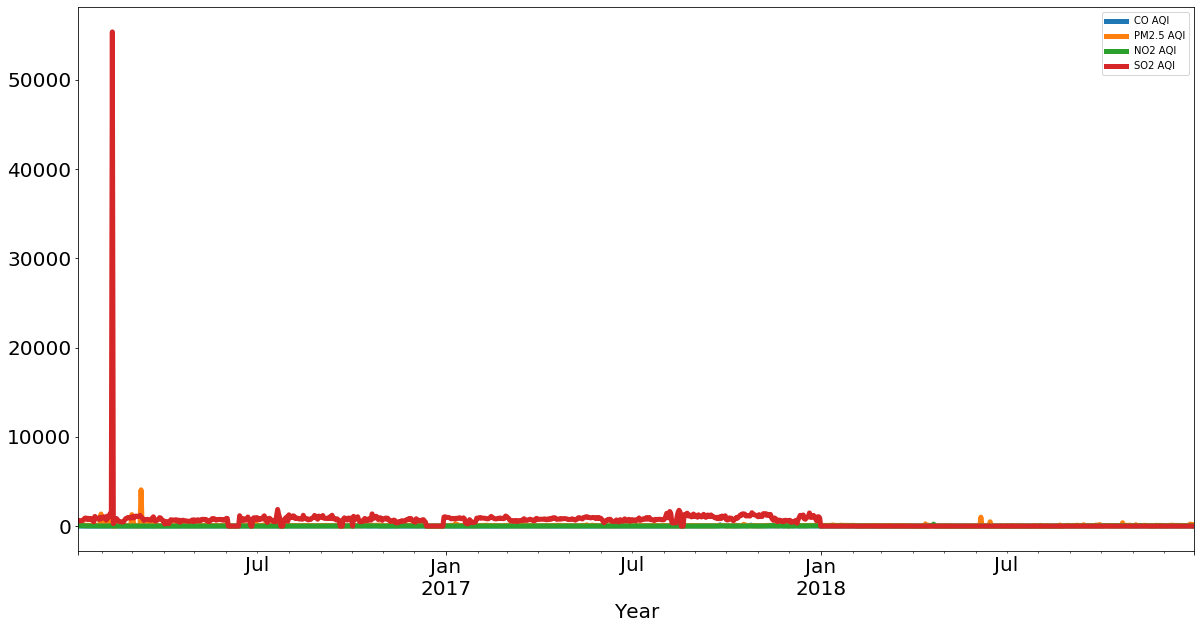

In [8]:
pollution_data['CO AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
pollution_data['PM2.5 AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
pollution_data['NO2 AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
pollution_data['SO2 AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.legend()

In [9]:
pollution_data.info()
pollution_data.isnull().sum()
pollution_data.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1088 entries, 2016-01-09 to 2018-12-31
Data columns (total 17 columns):
ToDate          1088 non-null datetime64[ns]
PM2.5           1088 non-null float64
CO              1088 non-null float64
NO2             1088 non-null float64
SO2             1088 non-null float64
NO              1088 non-null float64
PM2.5 EXCEED    1088 non-null int64
CO EXCEED       1088 non-null int64
N02 EXCEED      1088 non-null int64
SO2 EXCEED      1088 non-null int64
NO EXCEED       1088 non-null int64
PM2.5 AQI       1088 non-null int64
CO AQI          1088 non-null int64
NO2 AQI         1088 non-null int64
SO2 AQI         1088 non-null int64
NO AQI          1088 non-null int64
AverageAQI      1088 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(10)
memory usage: 153.0 KB


(1088, 17)

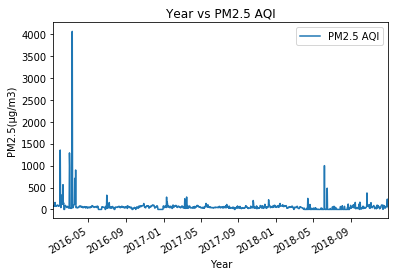

<Figure size 3600x2160 with 0 Axes>

In [10]:
#plt.figure(figsize=(50,30))
pollution_data.plot(x='ToDate', y='PM2.5 AQI', style='-')  
plt.title('Year vs PM2.5 AQI')  
plt.xlabel('Year')  
plt.ylabel('PM2.5(µg/m3)')
plt.figure(figsize=(50,30))
plt.show()

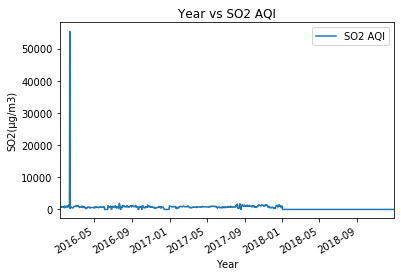

In [11]:
pollution_data.plot(x='ToDate', y='SO2 AQI', style='-')  
plt.title('Year vs SO2 AQI')  
plt.xlabel('Year')  
plt.ylabel('SO2(µg/m3)')  
plt.show()

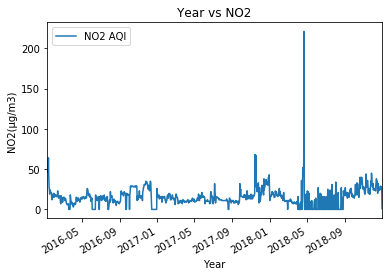

In [12]:
pollution_data.plot(x='ToDate', y='NO2 AQI', style='-')  
plt.title('Year vs NO2')  
plt.xlabel('Year')  
plt.ylabel('NO2(µg/m3)')  
plt.show()

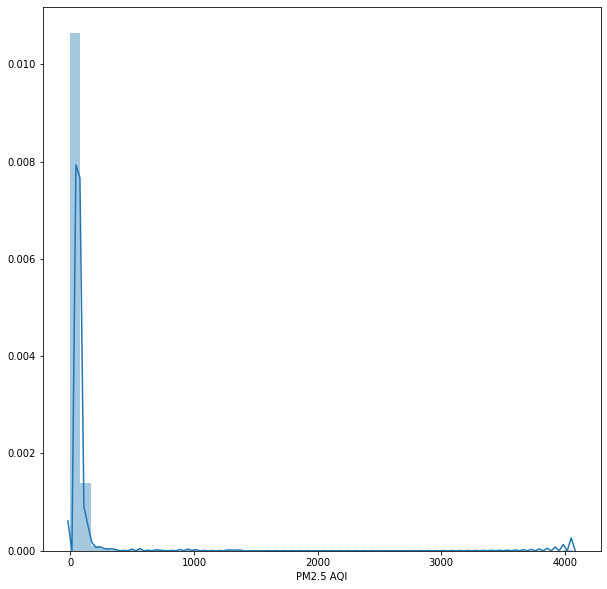

In [13]:
plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(pollution_data['PM2.5 AQI'])

# LINEAR REGRESSION

# PM2.5

In [120]:
import datetime as dt
pollution_data['ToDate'] = pd.to_datetime(pollution_data['ToDate'])
pollution_data['ToDate']=pollution_data['ToDate'].map(dt.datetime.toordinal)


X = pollution_data.loc[:,['ToDate','PM2.5 AQI']].values

y = pollution_data.loc[:,'PM2.5'].values.reshape(-1,1)


In [121]:
X

array([[719163,     72],
       [719163,     72],
       [719163,     71],
       ...,
       [719163,    190],
       [719163,    167],
       [719163,     45]], dtype=int64)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [123]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.00925166]
[[0.        0.9999826]]


In [125]:
y_pred = regressor.predict(X_test)

In [126]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,53.53,53.989809
1,85.31,84.989270
2,28.97,28.990244
3,72.44,71.989496
4,0.00,-0.009252
5,116.93,116.988713
6,112.02,111.988800
7,64.75,64.989618
8,159.61,159.987965
9,20.01,19.990400


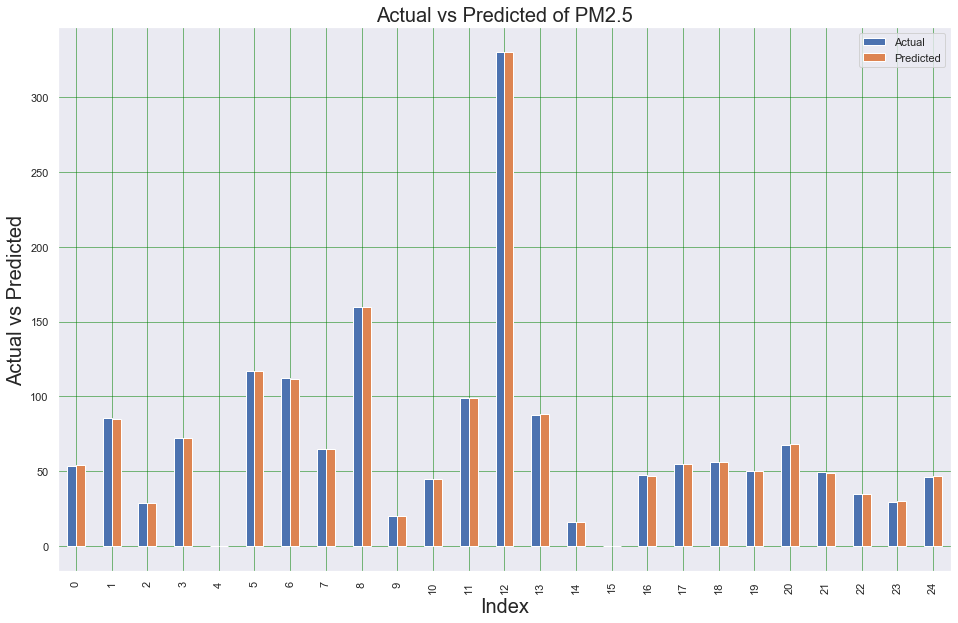

In [150]:
#df1.pollution_data= pd.to_datetime(pollution_data.ToDate)
#df1.set_index('ToDate', inplace=True)
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Index', fontsize=20)
plt.ylabel('Actual vs Predicted', fontsize=20)
plt.title("Actual vs Predicted of PM2.5",fontsize=20)
plt.show()


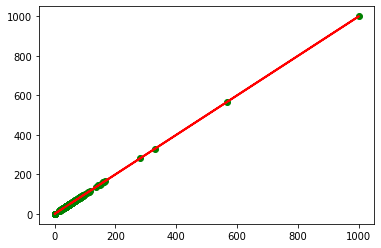

In [22]:
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21302486326735065
Mean Squared Error: 0.07025989658542195
Root Mean Squared Error: 0.26506583443631876


In [24]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

99.9987814187821 %


# SO2

In [134]:
import datetime as dt
pollution_data['ToDate'] = pd.to_datetime(pollution_data['ToDate'])
pollution_data['ToDate']=pollution_data['ToDate'].map(dt.datetime.toordinal)
X = pollution_data.loc[:,['ToDate','SO2 AQI']].values
y = pollution_data.loc[:,'SO2'].values.reshape(-1,1)
X

array([[719163,    626],
       [719163,    576],
       [719163,    605],
       ...,
       [719163,      1],
       [719163,      0],
       [719163,      0]], dtype=int64)

In [135]:
y

array([[6.2617e+02],
       [5.7603e+02],
       [6.0532e+02],
       ...,
       [9.5000e-01],
       [4.6000e-01],
       [3.5000e-01]])

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [137]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.00143288]
[[0.        0.9999961]]


In [139]:
y_pred = regressor.predict(X_test)

In [140]:
d = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
d

,Actual,Predicted
0,764.66,764.995582
1,0.86,0.998563
2,550.65,550.996417
3,608.44,607.996195
4,0.00,-0.001433
5,585.62,585.996281
6,0.52,0.998563
7,271.81,271.997506
8,0.77,0.998563
9,0.98,0.998563


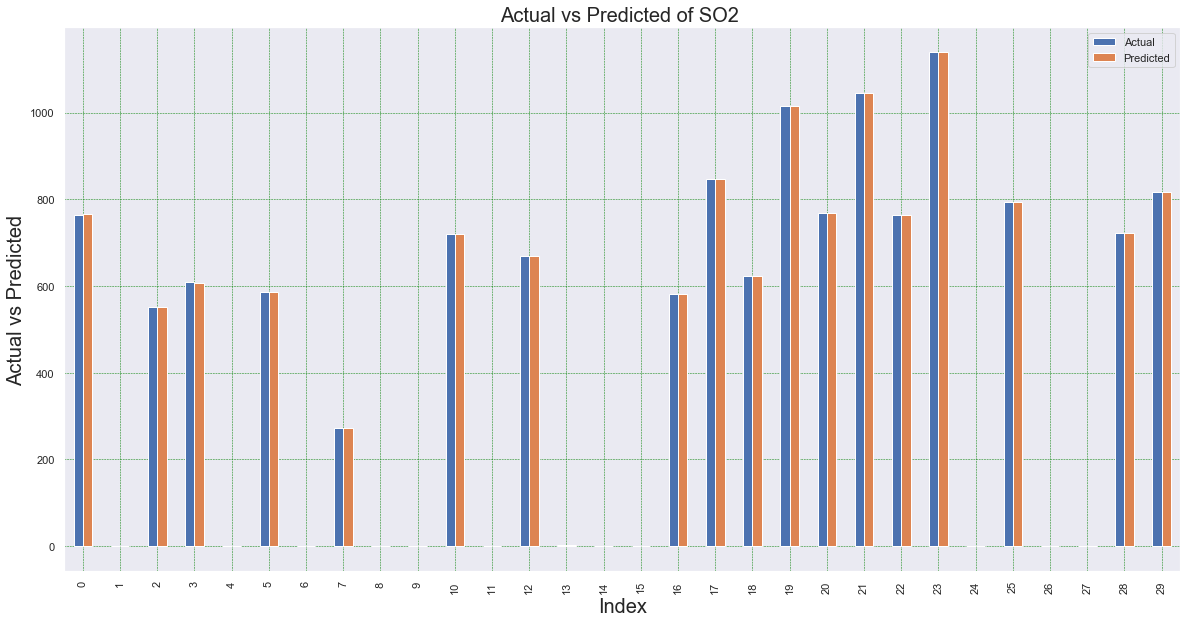

In [151]:
df1 = d.head(30)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
plt.xlabel('Index', fontsize=20)
plt.ylabel('Actual vs Predicted', fontsize=20)
plt.title("Actual vs Predicted of SO2 ",fontsize=20)
plt.show()
plt.show()

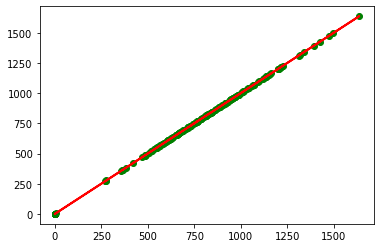

In [33]:
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21571923921837155
Mean Squared Error: 0.0705737415413078
Root Mean Squared Error: 0.2656571880098632


In [35]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

99.99996373801288 %


# NO2

In [36]:
X = pollution_data['NO2 AQI'].values.reshape(-1,1)
y = pollution_data['NO2'].values.reshape(-1,1)
X

array([[49],
       [47],
       [52],
       ...,
       [28],
       [ 5],
       [ 1]], dtype=int64)

In [37]:
y

array([[49.43],
       [46.84],
       [51.56],
       ...,
       [27.93],
       [ 5.22],
       [ 1.13]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [39]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.00264908]
[[0.99951501]]


In [41]:
y_pred = regressor.predict(X_test)

In [42]:
C = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
C

,Actual,Predicted
0,30.96,30.982316
1,25.20,24.985226
2,12.95,12.991046
3,15.55,15.989591
4,0.00,-0.002649
5,20.26,19.987651
6,26.92,26.984256
7,2.79,2.995896
8,15.14,14.990076
9,25.55,25.984741


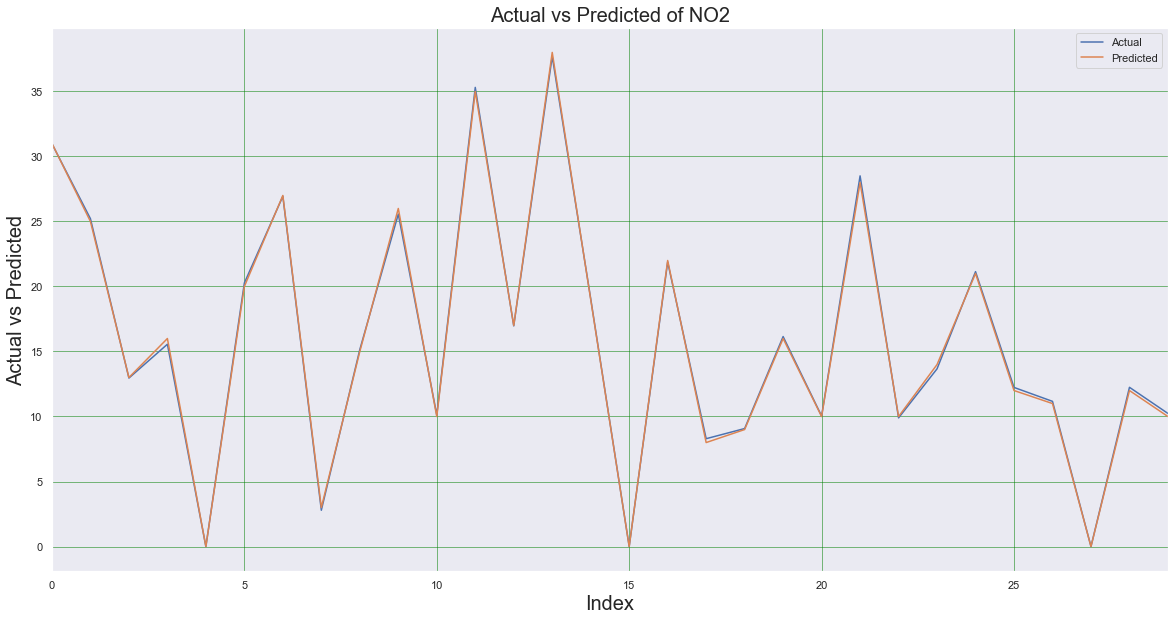

In [152]:
df1 = C.head(30)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Index', fontsize=20)
plt.ylabel('Actual vs Predicted', fontsize=20)
plt.title("Actual vs Predicted of NO2",fontsize=20)
plt.show()
plt.show()



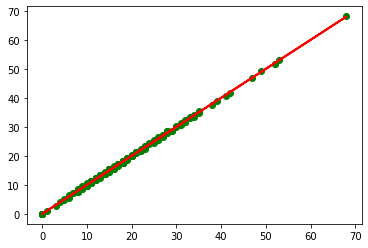

In [44]:
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2122568823506936
Mean Squared Error: 0.06964333673767846
Root Mean Squared Error: 0.2639002401243289


In [46]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

99.93967699013074 %


# LOGISTIC REGRESSION

# PM2.5

In [47]:
X=pollution_data.iloc[:,12].values.reshape(-1,1)
y=pollution_data.iloc[:,7].values.reshape(-1,1)

y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#print(X_train[0:10,:])

In [52]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix : 
 [[ 31   9]
 [  0 178]]
Accuracy :  0.9587155963302753


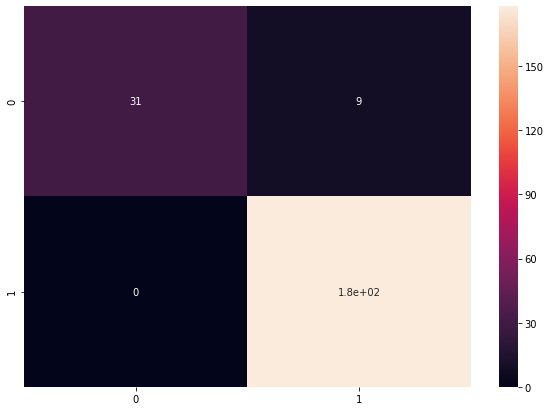

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

# SO2

In [54]:
X=pollution_data.iloc[:,15].values.reshape(-1,1)
y=pollution_data.iloc[:,10].values.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

Confusion Matrix : 
 [[207   0]
 [  4   7]]
Accuracy :  0.981651376146789


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


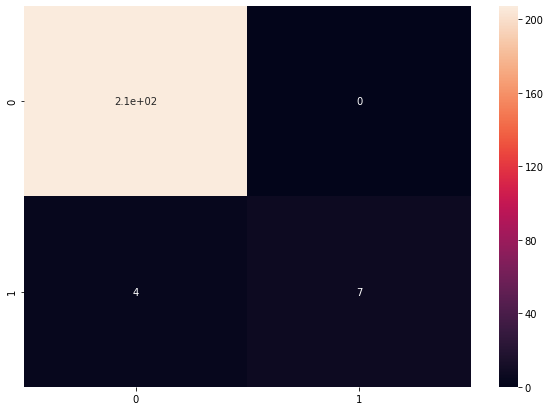

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#print(X_train[0:10,:])
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)

# ARIMA MODEL

In [56]:
newdata=pollution_data[['ToDate','AverageAQI']]
newdata

,ToDate,AverageAQI
From_Date,,
2016-01-09,2016-01-10,151.8
2016-01-10,2016-01-11,141.2
2016-01-11,2016-01-12,148.2
2016-01-12,2016-01-13,148.6
2016-01-13,2016-01-14,158.4
2016-01-14,2016-01-15,188.4
2016-01-15,2016-01-16,197.8
2016-01-16,2016-01-17,208.2
2016-01-17,2016-01-18,172.4


In [57]:
newdata.to_csv('data.csv')

In [58]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import plotly.plotly as py
%matplotlib inline
import seaborn as sns
sns.set()

In [59]:
df = pd.read_csv('data.csv', skiprows=0)
df.head()

,From_Date,ToDate,AverageAQI
0,2016-01-09,2016-01-10,151.8
1,2016-01-10,2016-01-11,141.2
2,2016-01-11,2016-01-12,148.2
3,2016-01-12,2016-01-13,148.6
4,2016-01-13,2016-01-14,158.4


In [60]:
df.FromDate = pd.to_datetime(df.ToDate)
df.set_index('ToDate', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [61]:
df.head(730)

,From_Date,AverageAQI
ToDate,,
2016-01-10,2016-01-09,151.8
2016-01-11,2016-01-10,141.2
2016-01-12,2016-01-11,148.2
2016-01-13,2016-01-12,148.6
2016-01-14,2016-01-13,158.4
2016-01-15,2016-01-14,188.4
2016-01-16,2016-01-15,197.8
2016-01-17,2016-01-16,208.2
2016-01-18,2016-01-17,172.4


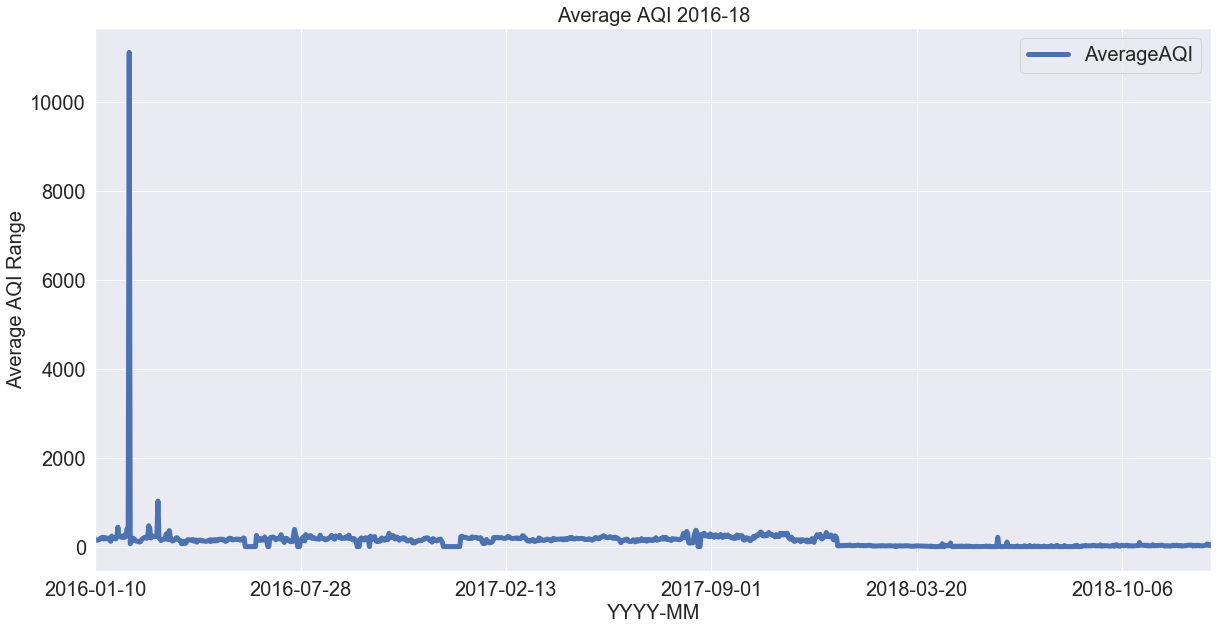

In [62]:
df['AverageAQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('YYYY-MM', fontsize=20)
plt.ylabel('Average AQI Range', fontsize=20)
plt.title("Average AQI 2016-18",fontsize=20)
plt.legend(fontsize=20)
#plt.savefig("PM AQI Graph")


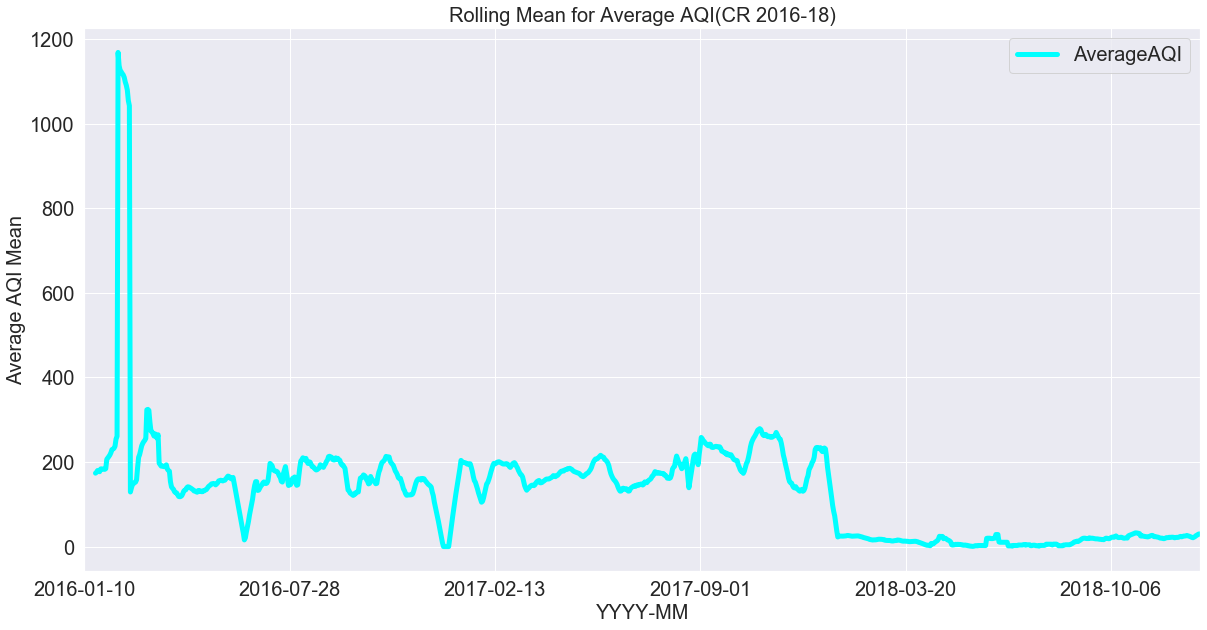

In [63]:
AVGAQI = df[['AverageAQI']]
AVGAQI.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20, color="cyan")
plt.xlabel('YYYY-MM',size=20);
plt.ylabel('Average AQI Mean', fontsize=20)
plt.title('Rolling Mean for Average AQI(CR 2016-18)', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('Rolling Mean')

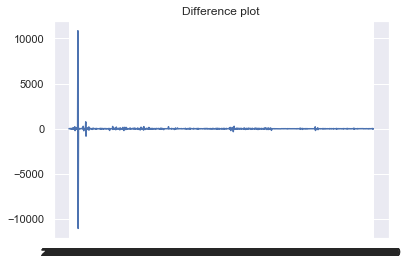

In [64]:
from statsmodels.tsa.stattools import acf, pacf
newavg=df['AverageAQI']
diff = newavg - newavg.shift()
newdiff=diff.iloc[1:]
#newdiff
plt.plot(diff)
#plt.xlabel('')
plt.title('Difference plot')
plt.savefig('newdiff')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


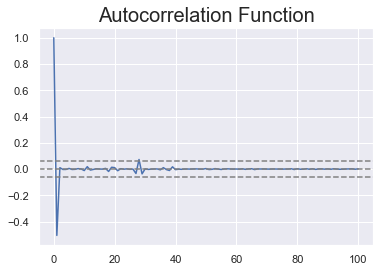

In [65]:
lag_acf = acf(newdiff, nlags=100)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(newdiff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(newdiff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function',fontsize=20)
plt.plot(figsize=(20,10))

plt.savefig('ACFFig')

In [66]:
lag_pacf = pacf(newdiff, nlags=20, method='ols')


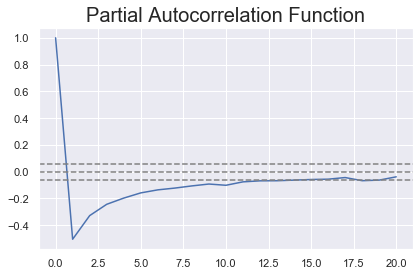

In [67]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(newdiff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(newdiff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function',fontsize=20)
plt.tight_layout()
plt.savefig('PACFFig')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


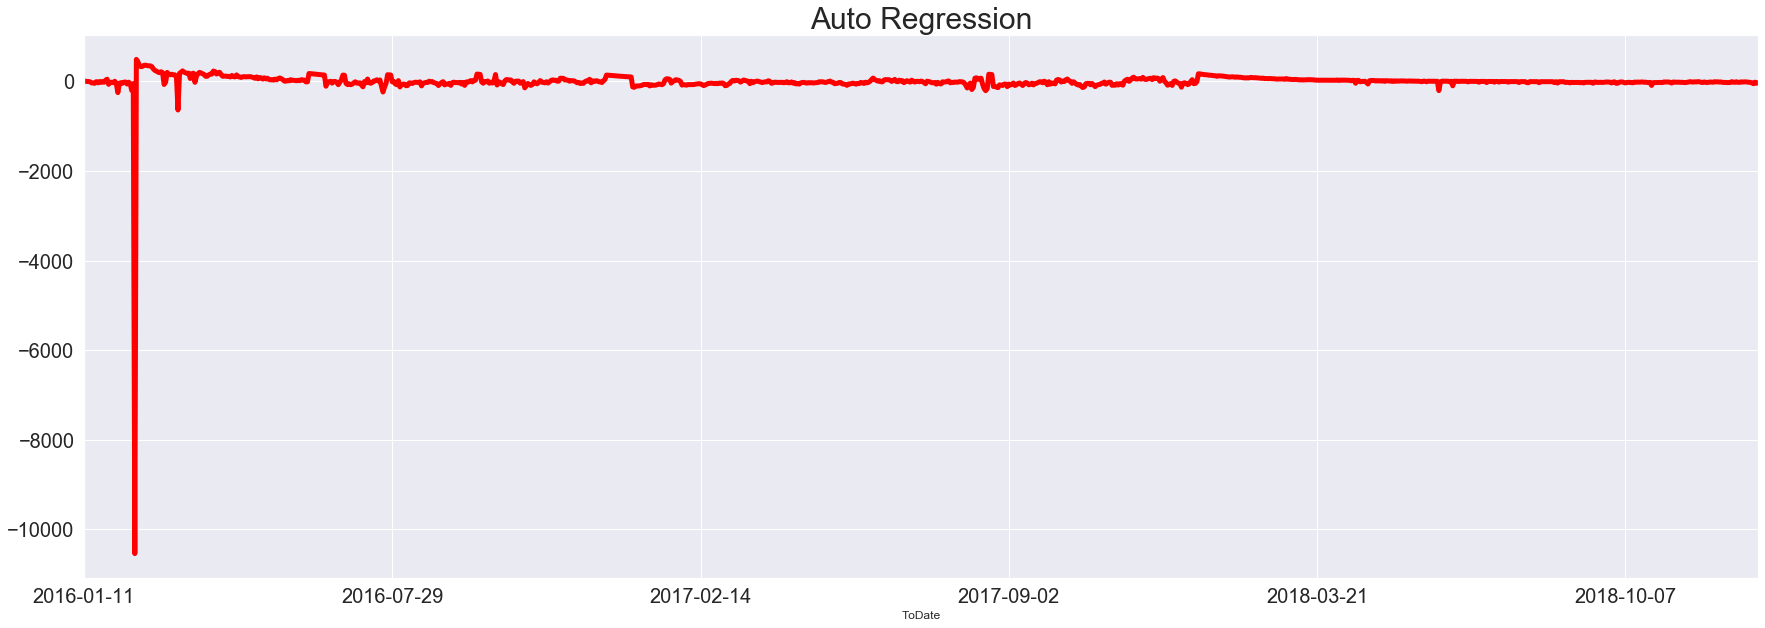

In [68]:
from statsmodels.tsa.arima_model import ARIMA
diff=AVGAQI.diff
model = ARIMA(AVGAQI, order=(1, 1, 2))  
results_AR = model.fit(disp=1)  
#AVGAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
results_AR.fittedvalues.plot(figsize=(30,10), linewidth=5, fontsize=20, color='red')
#plt.plot(results_AR.fittedvalues,figsize=(20,10), color='red')
plt.title('Auto Regression', fontsize=30)
#plt.legend(fontsize=20)
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-diff)**2))
plt.savefig('ARModel')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


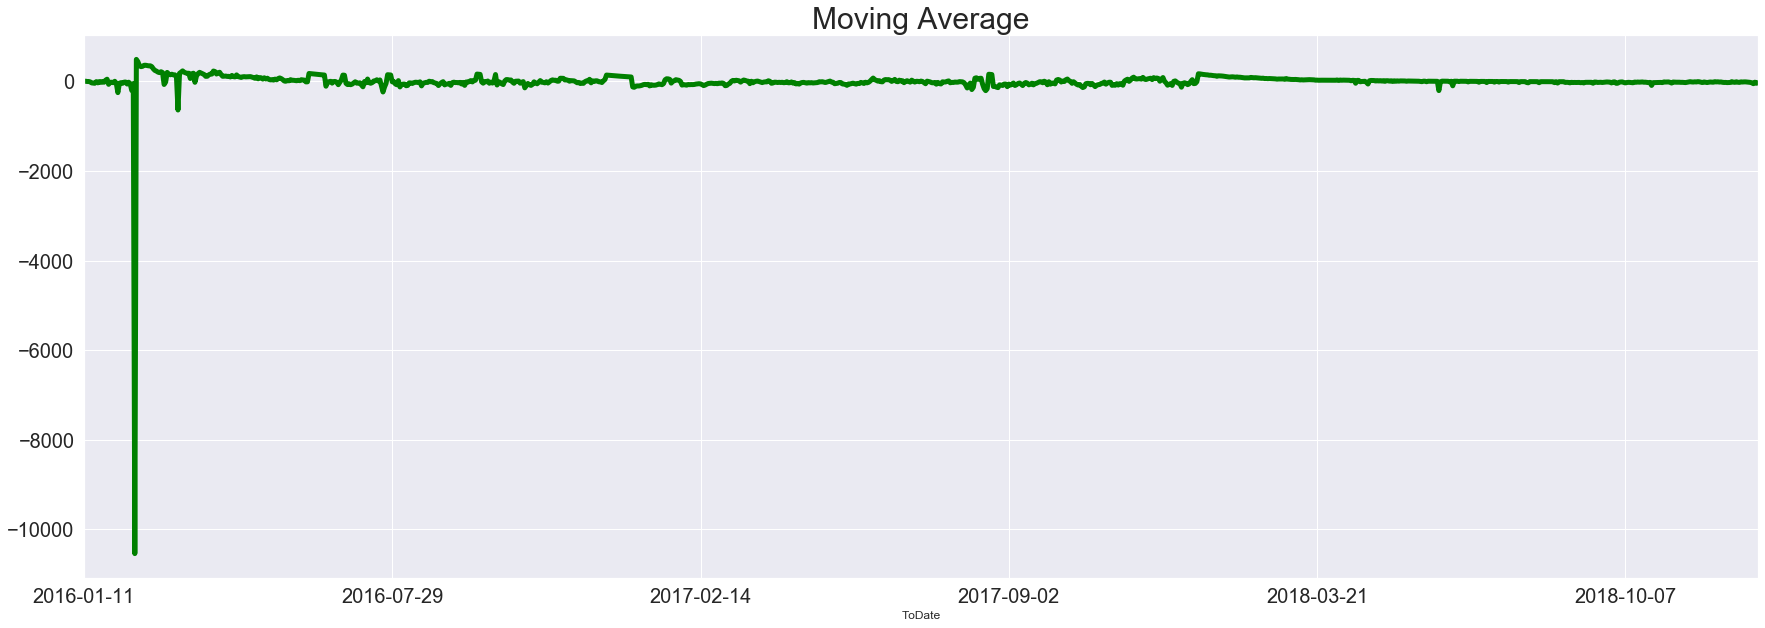

In [69]:
model = ARIMA(AVGAQI, order=(2, 1, 2))  
results_MA = model.fit(disp=-1)
#AVGAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
results_AR.fittedvalues.plot(figsize=(30,10), linewidth=5, fontsize=20, color='green')
#plt.plot(results_MA.fittedvalues, color='green')
plt.title('Moving Average', fontsize=30)
plt.savefig('MovingAverage')
#plt.legend(fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


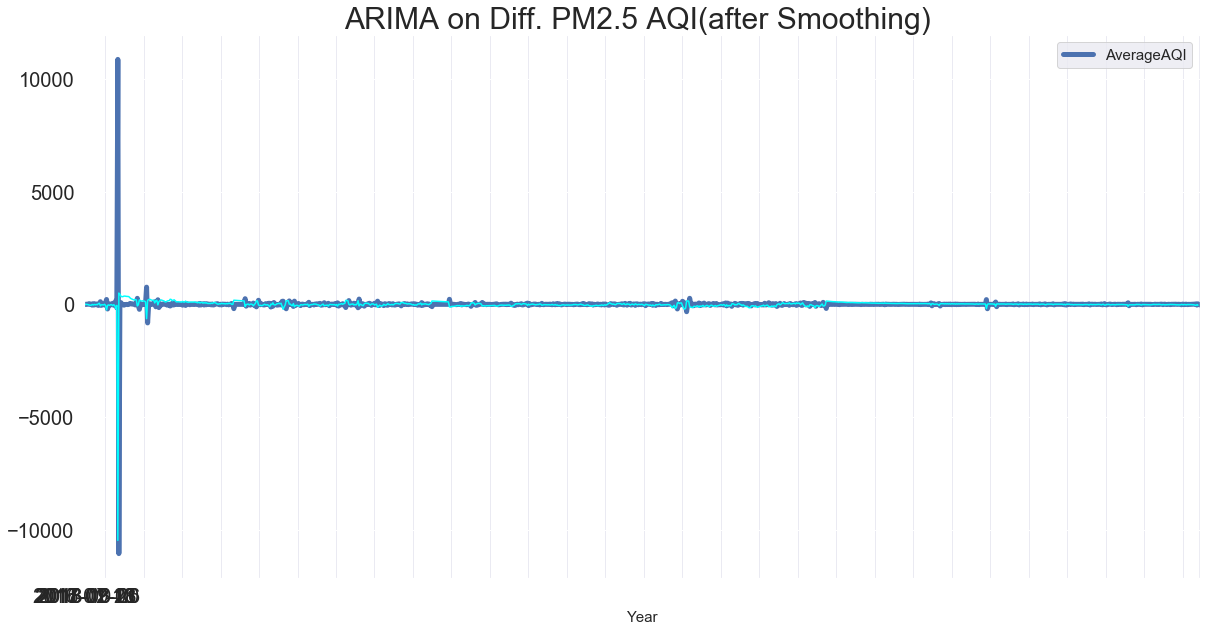

In [70]:
model = ARIMA(AVGAQI, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
AVGAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.plot(results_ARIMA.fittedvalues, color='cyan')
plt.title('ARIMA on Diff. PM2.5 AQI(after Smoothing) ', fontsize=30)
plt.legend(fontsize=15)
plt.savefig('ARIMA after Smoothing ')
plt.xlabel('Year', fontsize=15);




In [71]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head(10))

ToDate
2016-01-11    -0.247774
2016-01-12     4.896498
2016-01-13    -1.609688
2016-01-14    -1.751706
2016-01-15    -9.427778
2016-01-16   -32.905700
2016-01-17   -36.419255
2016-01-18   -41.103683
2016-01-19    -5.164749
2016-01-20   -31.310774
dtype: float64


In [72]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

ToDate
2016-01-11   -0.247774
2016-01-12    4.648724
2016-01-13    3.039036
2016-01-14    1.287330
2016-01-15   -8.140448
dtype: float64


In [73]:
predictions_ARIMA_log = pd.Series(AVGAQI.iloc[1], index=AVGAQI.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

ToDate
2016-01-10         NaN
2016-01-11   -0.247774
2016-01-12    4.648724
2016-01-13    3.039036
2016-01-14    1.287330
dtype: float64

In [74]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [75]:
print(predictions_ARIMA)

ToDate
2016-01-10              NaN
2016-01-11     7.805361e-01
2016-01-12     1.044516e+02
2016-01-13     2.088510e+01
2016-01-14     3.623099e+00
2016-01-15     2.915065e-04
2016-01-16     1.492397e-18
2016-01-17     2.276162e-34
2016-01-18     3.207009e-52
2016-01-19     1.832644e-54
2016-01-20     4.623615e-68
2016-01-21     3.740838e-69
2016-01-22     3.108542e-78
2016-01-23     4.997732e-80
2016-01-24     7.131158e-88
2016-01-25     1.455754e-76
2016-01-26     2.299660e-55
2016-01-27     2.744635e-83
2016-01-28     2.557162e-91
2016-01-29     3.579387e-99
2016-01-30    2.715710e-111
2016-01-31    7.062102e-110
2016-02-01    1.721867e-129
2016-02-02    4.132019e-237
2016-02-03    4.499550e-255
2016-02-04    9.589993e-267
2016-02-05    3.889681e-285
2016-02-06    1.044680e-291
2016-02-07    3.246467e-297
2016-02-08    4.990063e-322
                  ...      
2018-12-05              inf
2018-12-06              inf
2018-12-07              inf
2018-12-08              inf
2018-12-09   

In [76]:
df = pd.read_csv('data.csv')

#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:722] 
test=df[722:]

#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.ToDate,format='%Y-%m-%d ') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.ToDate,format='%Y-%m-%d') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.ToDate,format='%Y-%m-%d') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


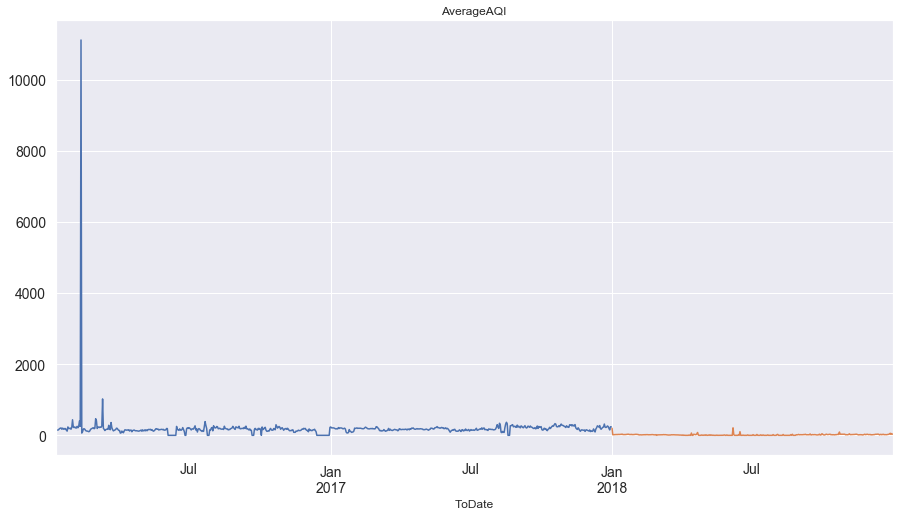

In [77]:
train.AverageAQI.plot(figsize=(15,8), title= 'AverageAQI', fontsize=14)
test.AverageAQI.plot(figsize=(15,8), title= 'AverageAQI', fontsize=14)
plt.show()